In [4]:
#Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Code

Download and load the MNIST dataset using the provided function load_data(), and:
1. Calculate pixelwise mean, variance, eigenvectors and eigenvalues.
2. Plot the mean and the first 10 eigenvector images.
3. Plot the first 100 eigenvalues.

In [1]:
import six.moves.cPickle as pickle
import gzip
import os
import numpy as np
from PIL import Image
from numpy import linalg as LA
import matplotlib.pyplot as plt
import urllib.request

In [2]:
def load_data(dataset):
    ''' Loads the dataset

    :type dataset: string
    :param dataset: the path to the dataset (here MNIST)

    copied from http://deeplearning.net/ and revised by hchoi
    '''

    # Download the MNIST dataset if it is not present
    if not os.path.isfile(dataset):
        origin = (
            'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
        )
        print('Downloading data from %s' % origin)
        urllib.request.urlretrieve(origin, dataset)

    print('Loading data...')

    # Load the dataset
    with gzip.open(dataset, 'rb') as f:
        try:
            train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
        except:
            train_set, valid_set, test_set = pickle.load(f)
    # train_set, valid_set, test_set format: tuple(input, target)
    # input is a numpy.ndarray of 2 dimensions (a matrix)
    # where each row corresponds to an example. target is a
    # numpy.ndarray of 1 dimension (vector) that has the same length as
    # the number of rows in the input. It should give the target
    # to the example with the same index in the input.
    print('... data has been loaded!')
    return train_set, valid_set, test_set

In [3]:
#Load the data into train, validation and test sets
train_set, val_set, test_set = load_data('mnist.pkl.gz')

#Separate each set into image vector (_x) and label (_y)
train_x, train_y = train_set
val_x, val_y = val_set
test_x, test_y = test_set

Loading data...
... data has been loaded!


In [4]:
#Check that the shapes (dimensions) of the labels make sense.
print(train_x.shape)
print(train_y.shape)
#Answer these questions to yourself: what do these dimensions mean? How many data samples are there?

(50000, 784)
(50000,)


## Mean, variance, eigenvectors and eigenvalues.

In [5]:
#Compute the pixelwise mean of the images from train_x. Complete the ... space with your code
mean_img = np.mean(train_x, axis=0)
#Check the shape. It should be (784,)
print(mean_img.shape)

(784,)


In [6]:
#Compute the pixelwise variance of the images from train_x. Complete the ... space with your code
var_img = np.mean(train_x, axis = 0)
#Check the shape. It should be (784,)
print(var_img.shape)

(784,)


In [17]:
#Compute the eigenvectors and eigenvalues, complete ... with your code
#first, compute the covariance matrix of train_x (careful with the dimensions)
cov = np.cov(train_x, rowvar=False)
#Check the shape, it should be (784, 784)
print(cov.shape)
#Get the eigenvalues and eigenvectors
eigval, eigvec = np.linalg.eig(cov)
#Print their shapes
print(eigval.shape, eigvec.shape)

(784, 784)
(784,) (784, 784)


## Print the mean and the first 10 eigenvector images.

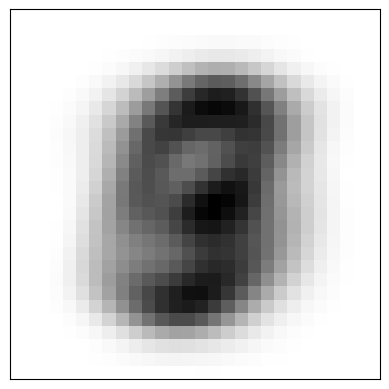

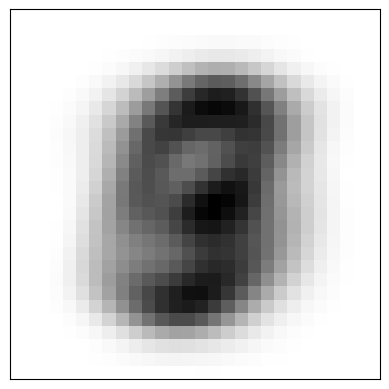

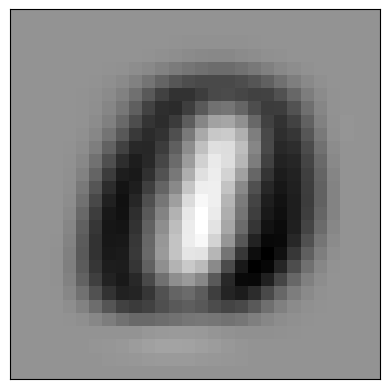

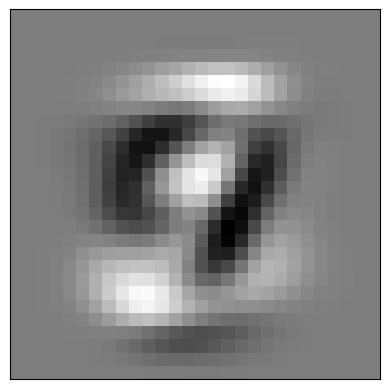

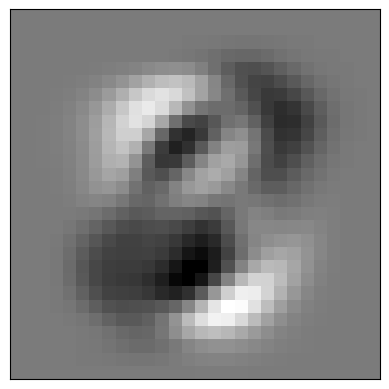

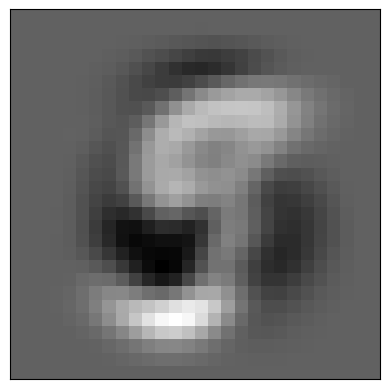

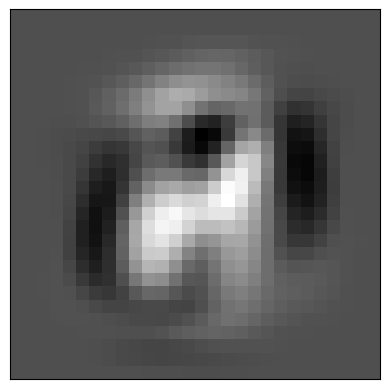

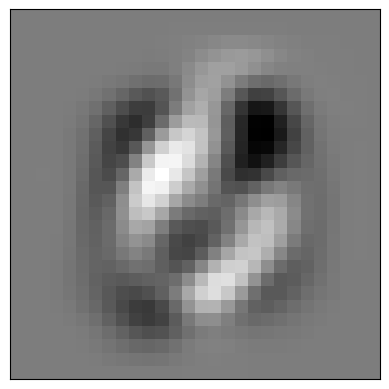

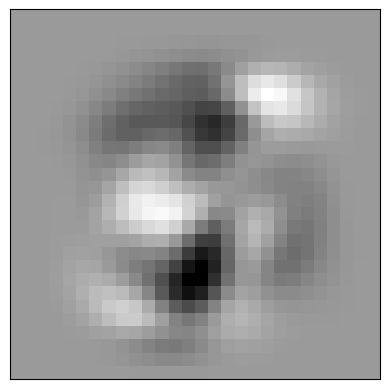

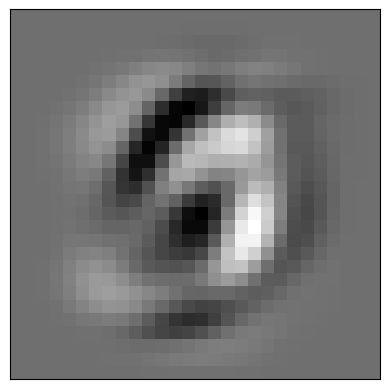

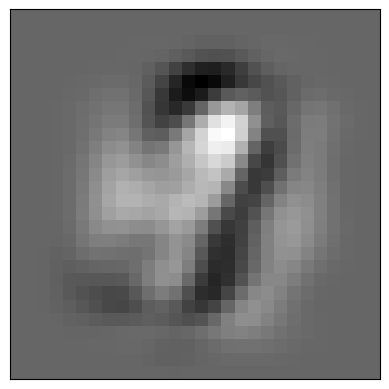

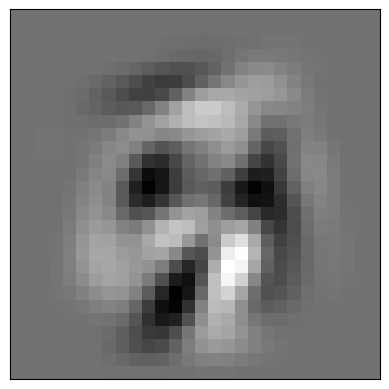

In [31]:
#example with variance
plt.figure()
fig = plt.imshow(np.asarray(var_img).reshape(28,28),origin = 'upper')
fig.set_cmap('gray_r')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()
plt.close()

#do the same with the mean
plt.figure()
fig = plt.imshow(np.asarray(mean_img).reshape(28,28),origin = 'upper')
fig.set_cmap('gray_r')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()
plt.close()

#and the 10 eigenvectors
for i in range(10): #select the first 10 eigenvectors. complete the ...
  plt.figure()
  fig = plt.imshow(np.asarray(eigvec[:,i]).reshape(28,28),origin = 'upper')
  fig.set_cmap('gray_r')
  fig.axes.get_xaxis().set_visible(False)
  fig.axes.get_yaxis().set_visible(False)
  plt.show()
  plt.close()

## Plot the first 100 eigenvalues

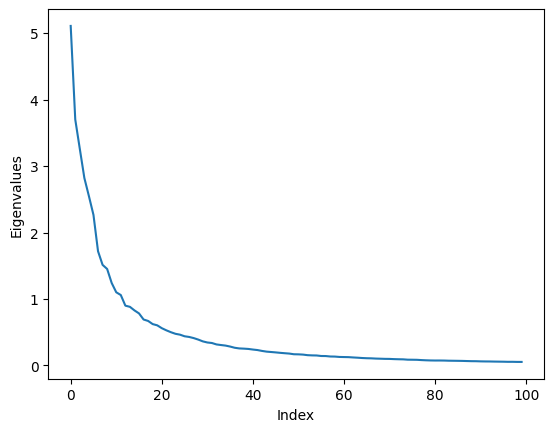

In [29]:
#complete the ...
plt.figure()
fig = plt.plot(np.asarray(eigval[:100]))
plt.xlabel('Index')
plt.ylabel('Eigenvalues')
plt.show()
plt.close()

# ChatGPT prompts

Now solve the same task with ChatGPT with the following prompts:


1.   Give me the code for computing the pixelwise mean, variance, eigenvectors and eigenvalues (using the covariance matrix) of the train set of MNIST.
2.   Give me a code to plot this pixelwise mean, 10 eigenvectors and the first 100 eigenvalues.



<ipython-input-12-22d7018d4bb2>:33: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, i + 1)


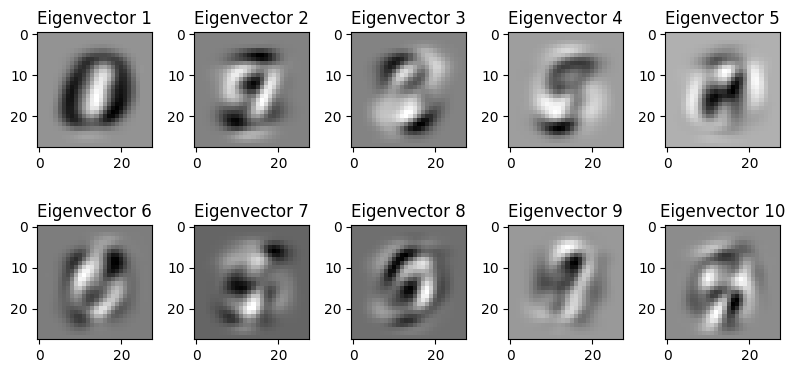

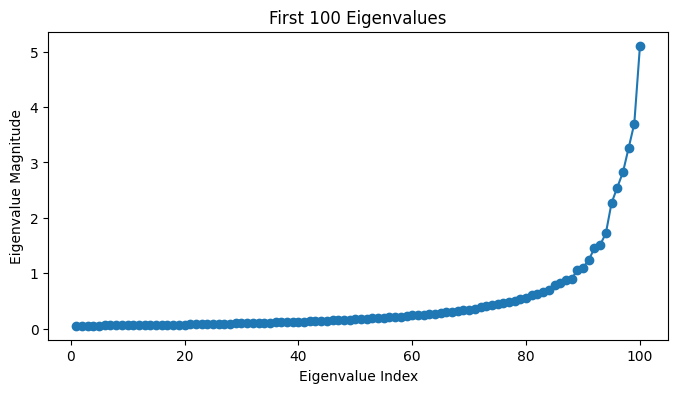

In [12]:
#paste ChatGPT's code here and run it

# First, you need to load the MNIST dataset. You can use the fetch_openml function from scikit-learn to download it:
# Load the MNIST dataset
#X = mnist.data.astype('float64')
# here,  I litte change the code
X = train_x

# Next, compute the pixelwise mean and variance:
import numpy as np
# Compute the pixelwise mean
mean_image = np.mean(X, axis=0)
# Compute the pixelwise variance
variance_image = np.var(X, axis=0)

# To compute the eigenvectors and eigenvalues using the covariance matrix, you can use the numpy.linalg.eigh function:
from numpy.linalg import eigh
# Compute the covariance matrix
covariance_matrix = np.cov(X, rowvar=False)
# Compute eigenvectors and eigenvalues
eigenvalues, eigenvectors = eigh(covariance_matrix)

# Now, let's plot the pixelwise mean, 10 eigenvectors, and the first 100 eigenvalues:
import matplotlib.pyplot as plt
# Plot the pixelwise mean
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(mean_image.reshape(28, 28), cmap='gray')
plt.title('Pixelwise Mean')
# Plot 10 eigenvectors
plt.subplot(1, 2, 2)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(eigenvectors[:, -i - 1].reshape(28, 28), cmap='gray')
    plt.title(f'Eigenvector {i + 1}')
plt.tight_layout()
# Plot the first 100 eigenvalues
plt.figure(figsize=(8, 4))
plt.plot(range(1, 101), eigenvalues[-100:], marker='o')
plt.title('First 100 Eigenvalues')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue Magnitude')
plt.show()



# Report

Answer the following questions.

1.   What are some differences you notice between your code and ChatGPT's? (Name at least 3)

First, gpt suggest sub plot to describe it on one second.
Second, gpt try to get image vector using "mnist.data.astype('float64')", but it doesn't works well. So need to use train_x to run the suggested code.
Third, when showing the plt figures, GPT set camp as a parameter of imshow function and axises visible.


2.   Ask ChatGPT why do we need to compute the covariance matrix in order to get the eigenvalues and aigenvectors. Paste the answer here. Do you agree with ChatGPT's statement? Why yes or why not?

GPT Answer :

[

The computation of eigenvalues and eigenvectors in the context of Principal Component Analysis (PCA) or other techniques related to linear algebraic transformations requires the computation of the covariance matrix because these techniques rely on the statistical properties of the data.

Here's why the covariance matrix is crucial for computing eigenvalues and eigenvectors:

1. **Statistical Information:** The covariance matrix summarizes the relationships and variances between different features (in this case, pixels in images). Each element in the covariance matrix represents the covariance between two features, and the diagonal elements represent the variances of individual features. This statistical information is essential for understanding the data's structure.

2. **Variance-Covariance Structure:** Eigenvectors and eigenvalues capture the directions and magnitudes of maximum variance in the data. In PCA, for instance, the eigenvectors of the covariance matrix represent the principal components of the data, which are orthogonal (uncorrelated) directions in the feature space that maximize the variance. The eigenvalues represent the amount of variance explained by each principal component.

3. **Dimensionality Reduction:** One common use of PCA is dimensionality reduction. By finding the eigenvectors of the covariance matrix, you can identify the most important features (principal components) and discard the less important ones, reducing the dimensionality of the data while preserving as much variance as possible.

4. **Whitening:** Another application is data whitening or decorrelation, where you transform the data using the eigenvectors and eigenvalues to make it less correlated and have a more uniform variance along each principal component.

In summary, the covariance matrix provides essential statistical information about the data's variance and relationships between features. This information is used to compute eigenvalues and eigenvectors, which, in turn, are used for various purposes such as dimensionality reduction, feature selection, and data transformation in machine learning and data analysis.

]

Yes. When computing with a covariance matrix, the eigenvalues are the covariance values for each axis. And the eigenvector is the correlation coefficient corresponding to each eigenvector. Therefore, the covariance matrix is very useful for finding eigenvalues and eigenvectors as likt GPT saids.

3.   Conclude with some thoughts and things you learned from this homework.

I have experience with calculating formulas, especially matrices and vectors, with programs. We also learned how to visualize this. We have acquired an intuitive and convenient way to access the mathematical concepts that we had laboriously calculate4d by hand and pen. Very good.

